# Exploratory Data Analysis and Data Visualization

Exploratory Data Analysis and Data Visualization are done for the following reasons:

- Identify additional problems in the data that require cleaning or awareness (e.g., bias, inconsistent entries, coding issues)
- Determine needed data transformations
- Indicate directions for analysis

In [20]:
# Packages for loading, cleaning, visualization, and analysis

# Data
import pandas as pd
import numpy as np
import scipy as sp
import os
import string as st

# Graphing and visualizing
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm
from pylab import savefig


# Printing
import locale

# Show plots locally
locale.setlocale( locale.LC_ALL, '' )

%matplotlib inline

### In Class Exercise 1

Load the clean train accidents data and look at the summaries of quantitative and qualitative variables. List a few transformations or data operations suggested by these summaries. Also what variables are response variables and what variables are predictors?

In [9]:
acc_df = pd.read_csv('/Users/mead/Fall2017/DonBrown-DS6001/InClass1/FullClean.csv', low_memory = False, encoding = 'ISO-8859-1')

In [12]:
# Last set

acc_df[['TONS','TOTINJ','TOTKLD','TRKDMG','TRKNAME']].describe()
# Do this to pretty much every variable


,TONS,TOTINJ,TOTKLD,TRKDMG
count,38127.000000,38127.000000,38127.000000,3.812700e+04
mean,3369.833583,0.120256,0.003200,3.544056e+04
std,4786.572296,5.922101,0.093262,1.487917e+05
min,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,0.000000,0.000000,0.000000e+00
50%,1110.000000,0.000000,0.000000,3.000000e+03
75%,5246.000000,0.000000,0.000000,1.964650e+04
max,99000.000000,1000.000000,9.000000,9.930000e+06


In [15]:
acc_df.shape

(38318, 154)

In [14]:
cat_list = acc_df.columns[acc_df.dtypes=='object']

for name in cat_list:
    print('Variable Name: ' + name)
    print(acc_df[name].value_counts)
    print()

Variable Name: Unnamed: 0
<bound method Series.value_counts of 0            0
1            1
2            2
3            3
4            4
5            5
6            7
7            8
8            9
9           10
10          11
11          12
12          13
13          14
14          15
15          17
16          18
17          20
18          21
19          23
20          24
21          25
22          26
23          27
24          28
25          29
26          30
27          31
28          33
29          34
         ...  
38288      NaN
38289    THE P
38290    51584
38291    51586
38292    51591
38293    51594
38294    51596
38295    51597
38296    51598
38297      NaN
38298        T
38299    51599
38300    51600
38301    51601
38302    51602
38303    51604
38304    51606
38305    51607
38306    51609
38307    51610
38308    51611
38309    51612
38310    51613
38311    51614
38312    51616
38313    51617
38314    51618
38315    51619
38316    51621
38317    51622
Name: Unnamed: 0, Leng

Variable Name: EMPTYP2
<bound method Series.value_counts of 0                 0
1                 0
2                 0
3                 2
4                 0
5                 0
6                 0
7                 0
8                 0
9                 0
10                0
11                0
12                0
13                0
14                0
15                0
16                0
17                0
18                0
19                0
20                0
21                0
22                0
23                0
24                0
25                0
26                0
27                0
28                0
29                0
            ...    
38288           NaN
38289    Derailment
38290             0
38291             1
38292             0
38293             3
38294             0
38295             0
38296             0
38297           NaN
38298            80
38299             0
38300             0
38301             0
38302             0
38303             0


<bound method Series.value_counts of 0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
8        NaN
9        NaN
10       NaN
11       NaN
12       NaN
13       NaN
14       NaN
15       NaN
16       NaN
17       NaN
18       NaN
19       NaN
20       NaN
21       NaN
22       NaN
23       NaN
24       NaN
25       NaN
26       NaN
27       NaN
28       NaN
29       NaN
        ... 
38288    NaN
38289    NaN
38290    OTH
38291    CWR
38292    CWR
38293    CWR
38294    CWR
38295    CWR
38296    NaN
38297    NaN
38298    NaN
38299    CWR
38300    OTH
38301    OTH
38302    OTH
38303    CWR
38304    OTH
38305    CWR
38306    CWR
38307    CWR
38308    OTH
38309    OTH
38310    CWR
38311    OTH
38312    OTH
38313    OTH
38314    CWR
38315    CWR
38316    OTH
38317    CWR
Name: SSB1, Length: 38318, dtype: object>
()
Variable Name: SSB2
<bound method Series.value_counts of 0                NaN
1                NaN
2                NaN
3    

In [18]:
acc_df.dropna(axis = 1, thresh = (38318-1500)).shape

(38318, 83)

### In-Class Exercise 2

Use histograms, boxplots, scatter plot matrices (sns.pairplot) and heatmaps to look at characteristics and relationships of the response variables. 

In [26]:
Response = ['TOTKLD','TRKDMG','TOTINJ']
Predictors = ['ACCTRK']

Accident damage is coded as an object but needs to be a numeric

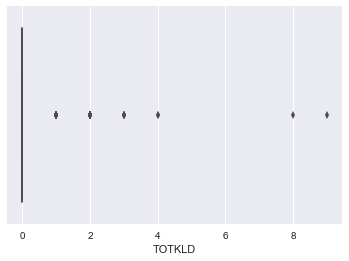

In [22]:
sns.boxplot(acc_df.TOTKLD)

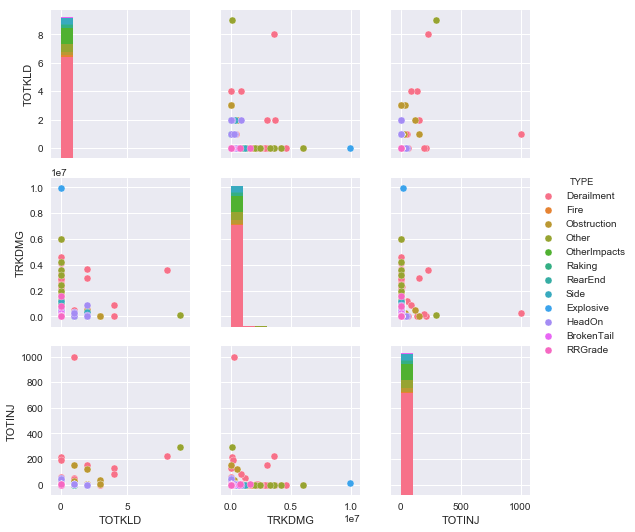

In [27]:
sns.pairplot(acc_df, vars = Response, hue='TYPE')

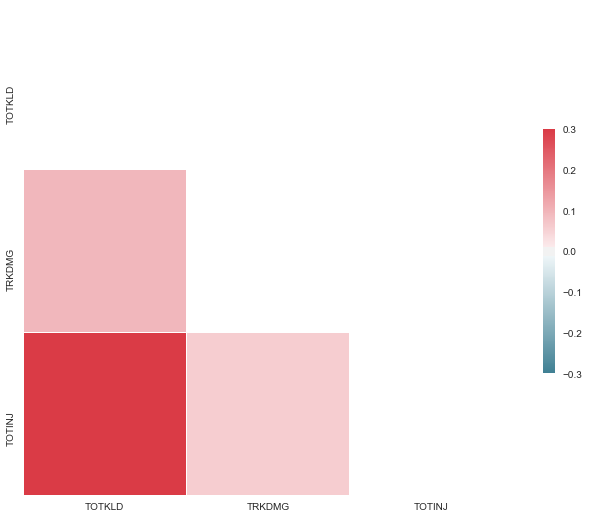

In [29]:
# Heat map to show correlations

sns.set(style="white")

# # Compute the correlation matrix
# for response variables
corr = acc_df[Response].corr()

# # Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# # Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# # Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# # Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### In-Class Exercise 3

Look at histograms of  the predictor variable TEMP at different binwidths and comment on what you observe.

ValueError: max must be larger than min in range parameter.

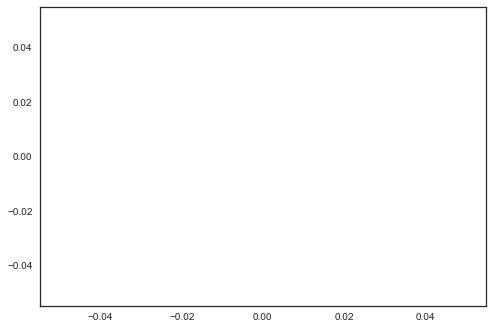

In [31]:
temp_hist = sns.distplot(acc_df[['TEMP']], bins=100, kde=False)
temp_hist.set_title('Acc Temp')
temp_hist.set_ylabel('Count')
temp_hist.set_xlabel('Temp in degrees')

In [ ]:
PredPlustACCDMG = Predictors


### In-Class Exercise 4

Look at scatter plot matrices with a small set of predictor variables (e.g., TRNSPD, TONS, TEMP) and ACCDMG. Also look at heat maps.

### In-Class Exercise 5 

Look at scatter plots between ACCDMG and TRNSPD condition on TYPE. Look at the plots with the log transform of ACCDMG. What do these plot imply?

TypeError: can't multiply sequence by non-int of type 'float'

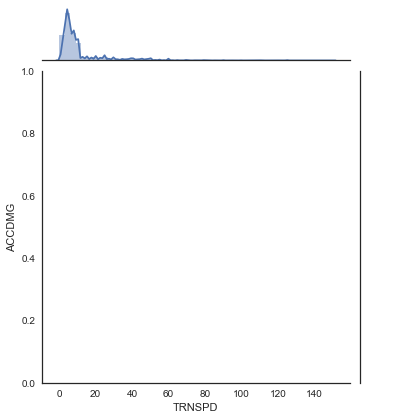

In [33]:
sns.jointplot('TRNSPD', 'ACCDMG', data=acc_df, kind='reg')